## 1. Business Understanding

### Project Overview
SyriaTel, a telecommunications company, is experiencing customer churn —customers leaving the service which leads to loss of revenue and market share. The business wants to predict which customers are likely to churn, so they can intervene before it's too late.

### Objective
The goal is to build a **binary classification model** to predict whether a customer will churn (`Yes` or `No`). This will help SyriaTel take proactive measures to retain high-risk customers.

### Key Stakeholders
- **Customer Retention Team** – reduce churn through early outreach.
- **Marketing** – tailor offers to at-risk users.
- **Executives** – make strategic, data-driven decisions.

### Key Questions
- What factors are most strongly associated with churn?
- Can we predict churn early using customer data?
- Which services or customer segments have the highest churn rates?

### Success Criteria
- High recall in identifying churners.
- Clear feature insights for actionable business decisions.



## 2. Data Understanding

In this step, we aim to get a clear overview of the dataset:

- Load and preview the data
- Examine feature types and basic statistics
- Identify missing values and duplicates
- Are features categorical, numerical, or boolean?
-  What is the distribution of the target variable (`Churn`)?

These insights will help guide our data preparation and modeling strategy.The dataset being used for this project was obtained from **kaggle**


Step 2.1 – Import Libraries

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import ttest_ind

#Make visuals look cleaner
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


Step 2.2 – Load Dataset

In [341]:
# Load dataset
df = pd.read_csv("../data/bigml_59c28831336c6604c800002a.csv")

# Preview first 5 rows
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Step 2.3 – Basic Data Overview

In [342]:
# Shape and column names
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nColumn names:", df.columns.tolist())

# Data types and non-null counts
df.info()


Dataset contains 3333 rows and 21 columns.

Column names: ['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6  

 Step 2.4 – Descriptive Statistics

In [343]:
# Numeric summary
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Step 3 – Data Preparation

Step 3.1 – Missing Values & Duplicates

In [344]:
# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing Values:\n", missing if not missing.empty else "No missing values found.")

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Missing Values:
 No missing values found.

Number of duplicate rows: 0


Before we analyze or model the data, we need to prepare it to ensure it is clean and consistent.

 3.2 Drop Irrelevant Columns

In [345]:
# Drop 'state' and 'phone number' – not useful for prediction
df.drop(columns=['state', 'phone number','area code'], inplace=True)


 3.3 Encode Binary Categorical Columns

In [346]:
# Convert 'international plan' and 'voice mail plan' to 0/1

label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan']) 
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan']) 



3.4 Encode Target Column

In [347]:
#Convert boolean churn column to 0/1
df['churn'] = df['churn'].astype(int)
df



,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


3.5 Handle Outliers (Cap using IQR)

In [348]:
# Cap numeric outliers using the IQR method
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))


3.6 Final Check

In [349]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   float64
 1   international plan      3333 non-null   int32  
 2   voice mail plan         3333 non-null   int32  
 3   number vmail messages   3333 non-null   float64
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   float64
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   float64
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   float64
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.003300,0.096910,0.276628,8.098710,179.816157,100.473597,30.569292,201.009541,100.134113,17.086016,200.828143,100.098410,9.037381,10.254575,4.424842,2.769320,1.476298,0.144914
std,39.644112,0.295879,0.447398,13.687436,54.152190,19.863740,9.205865,50.401365,19.758567,4.284135,50.118622,19.443717,2.255212,2.721007,2.272343,0.734445,1.107194,0.352067
min,1.000000,0.000000,0.000000,0.000000,34.650000,46.500000,5.890000,63.550000,46.500000,5.400000,64.550000,48.000000,2.915000,3.100000,0.000000,0.845000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,206.500000,1.000000,1.000000,50.000000,325.450000,154.500000,55.330000,338.350000,154.500000,28.760000,337.750000,152.000000,15.195000,17.500000,10.500000,4.725000,3.500000,1.000000


Step 4 – EDA (Exploratory Data Analysis)

### 4.1 Overall Class Balance (Target Variable)

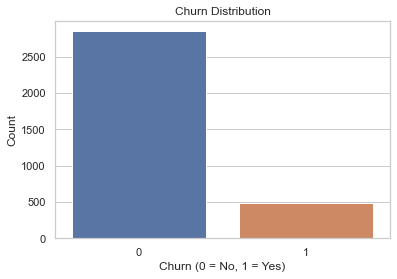

,proportion
0,0.855086
1,0.144914


In [350]:
# Check churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Print class balance
df['churn'].value_counts(normalize=True).to_frame('proportion')


#### Intepretation
The left bar (0) represents customers who did not churn — they stayed with SyriaTel.

The right bar (1) represents customers who did churn — they left the service

From the chart:

The churn = 0 group has around 2850 customers.

The churn = 1 group has around 480 customers.

Roughly 86% of customers stayed, while only 14% churned.




### 4.2 Univariate: Numerical Feature Distributions

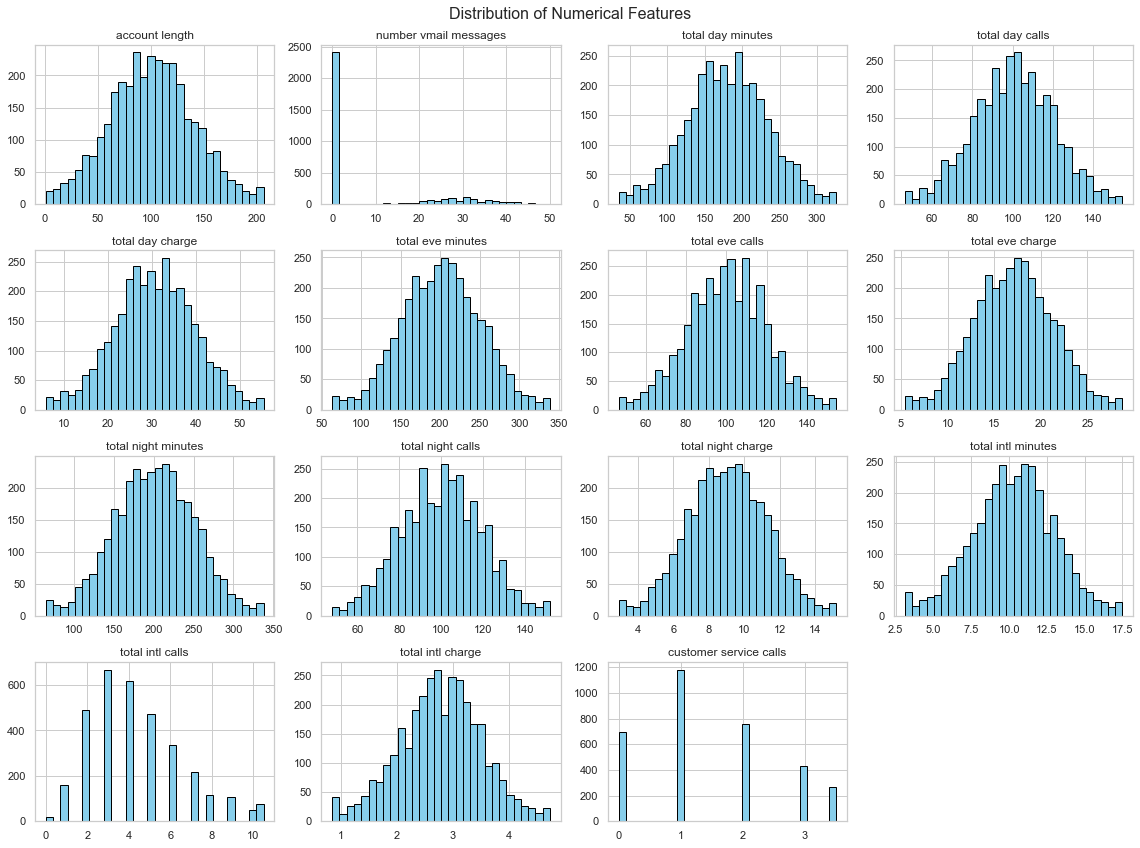

In [351]:

# Plot distributions of all numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Explicitly exclude any unwanted columns
exclude_cols = ['international plan', 'voice mail plan']
num_cols = [col for col in num_cols if col not in exclude_cols]

# Plot histograms for numeric features
df[num_cols].hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()



### Intepretations

- **Normal Distributions**: Most usage-related features (minutes, calls, charges) are bell-shaped, indicating balanced behavior across the customer base.
- **Skewed Features**: `number vmail messages`, `total intl calls`, and `customer service calls` are highly skewed. These features may offer strong predictive power for churn.
- **Actionable Insight**: Features like high `customer service calls` are worth investigating in churn analysis as they may correlate with customer dissatisfaction.





### 4.3 Boxplots of Numerical Features by Churn

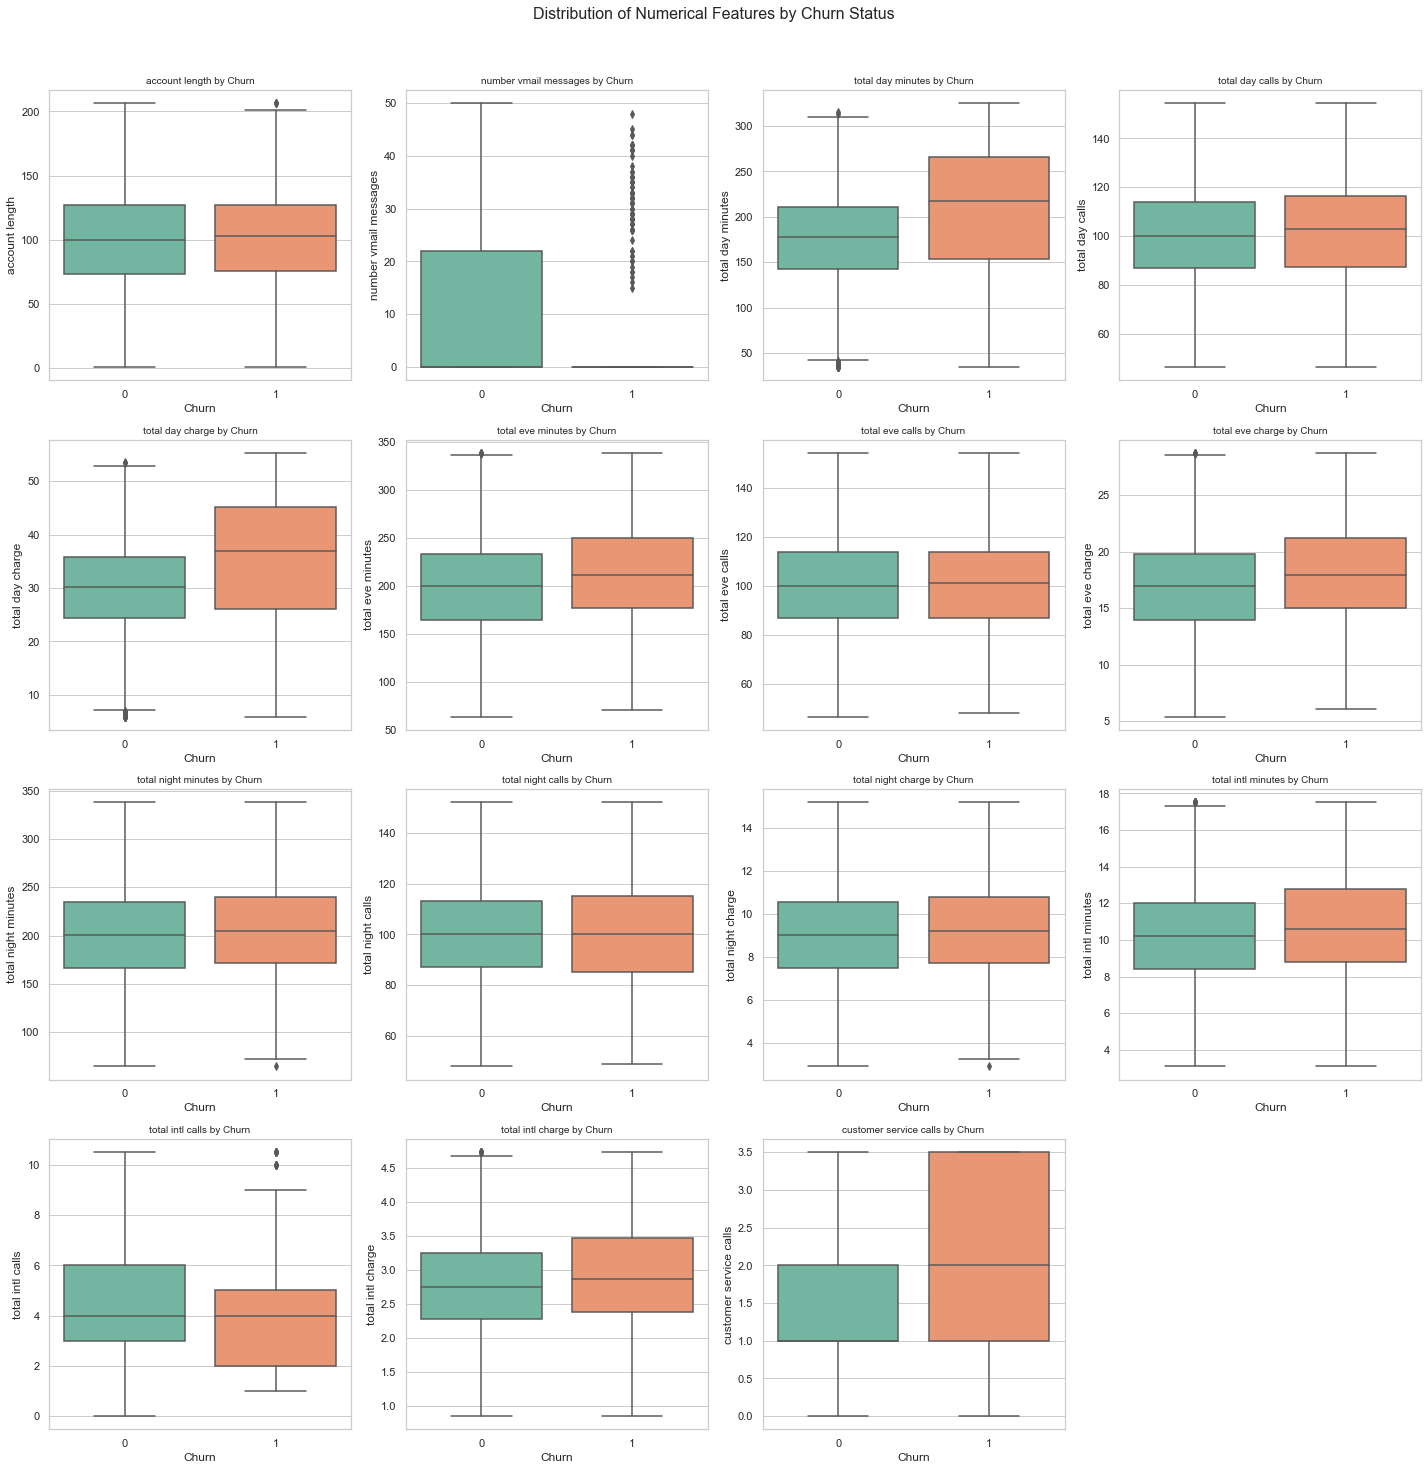

In [352]:
# Boxplots to compare churn vs key numerical features
# Define features to exclude
excluded = ['churn', 'voice mail plan', 'international plan']
num_cols = df.select_dtypes(include='number').drop(columns=excluded, errors='ignore').columns
# Setup subplot grid
n_cols = 4  # columns per row
n_rows = math.ceil(len(num_cols) / n_cols)
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()
# Generate boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='churn', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f"{col} by Churn", fontsize=10)
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)
# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Distribution of Numerical Features by Churn Status", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Interpretation

**Customer Service Calls** is the most discriminative feature—more service calls are strongly linked with churn.

**Voice Mail Messages** show a negative relationship with churn — voicemail usage is more common in loyal customers.

Most call-related features (minutes and charges) show small shifts in distribution, implying usage behavior differences.

Many features have outliers, especially in number vmail messages, intl calls, and customer service calls.

### 4.4 Categorical Features vs Churn (Barplots)

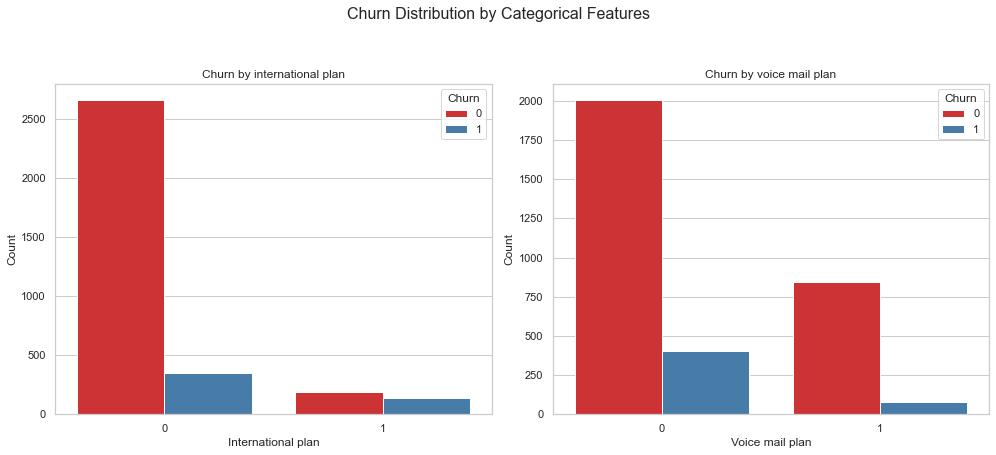

In [353]:
 ##Barplots for binary categorical features vs churn
cat_cols = ['international plan', 'voice mail plan']
# Create subplots – 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Loop through each feature and plot on the corresponding axis
for i, col in enumerate(cat_cols):
    sns.countplot(ax=axes[i], x=col, hue='churn', data=df, palette='Set1')
    axes[i].set_title(f"Churn by {col}")
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")
    axes[i].legend(title='Churn')
plt.suptitle("Churn Distribution by Categorical Features", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


Interpreration

International Plan: Customers with an international plan have a relatively higher churn rate compared to those without one.

Voice Mail Plan: Customers with a voice mail plan have a lower churn rate compared to those without one.

### 4.5 Correlation Heatmap

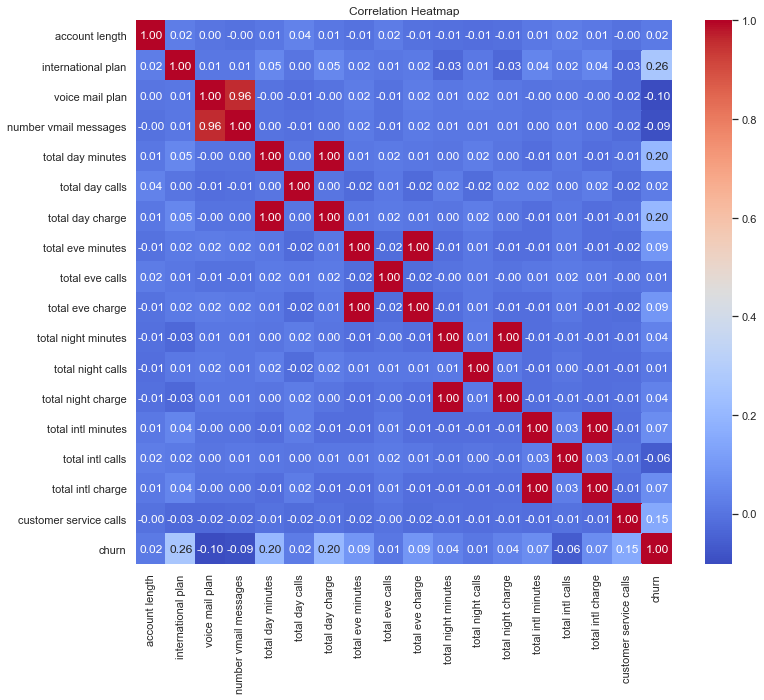

In [354]:
# Heatmap of numeric correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



### Intepretation
This correlation heatmap shows how strongly each variable relates to others.

**Churn**: Is positively correlated with international plan, total day charge, and customer service calls. It is negatively correlated with voice mail plan.

**Highly Correlated Pairs**: Strong positive correlations exist between total day minutes and total day **charge, total eve minutes and total eve charge, and total night minutes and total night charge. This is expected as charges are usually derived from minutes used.

**Low Correlations**: Most other variable pairs show very weak correlations (values close to 0.00).

**In summary**, for machine learning, focus should be on handling categorical variables appropriately, addressing multicollinearity in highly correlated numerical features and scaling numerical features

### 4.6 Pairplot of Top Predictors

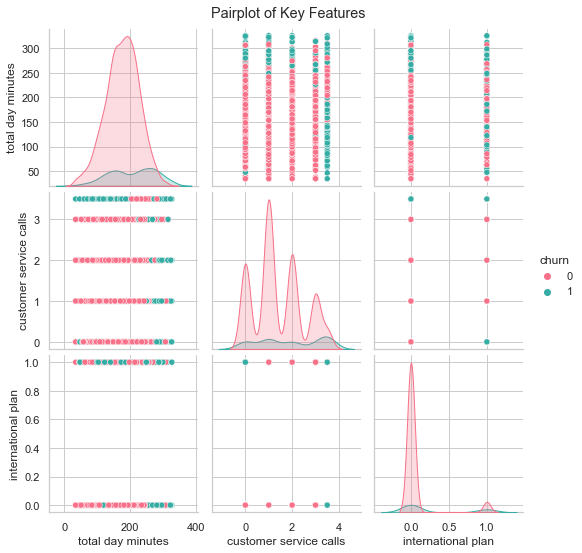

In [355]:
# Select top features based on intuition or previous corr
top_cols = ['total day minutes', 'customer service calls', 'international plan', 'churn']

sns.pairplot(df[top_cols], hue='churn', palette='husl')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


### Intepretation
This pairplot visualizes relationships between total day minutes, customer service calls, and international plan, colored by churn.

Total Day Minutes: Higher total day minutes (and likely higher day charges as seen previously) show a higher density of churned customers (teal).

Customer Service Calls: Churn increases notably with the number of customer service calls, especially for 3 or more calls.

International Plan: Having an international plan significantly correlates with churn, with a higher proportion of churned customers among those with the plan.

Feature Importance: All three features appear highly relevant for predicting churn.

Data Characteristics: Customer service calls and international plan are clearly categorical/discrete, while total day minutes is continuous. This reinforces the need for appropriate encoding and scaling for machine learning models.

### Step 5.Statistics


5.1 Churn Rate Summary

In [356]:
# 5.1 Churn Rate Summary
churn_counts = df['churn'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_counts.round(2))


Churn Rate (%):
0    85.51
1    14.49
Name: churn, dtype: float64


5.2 Compare Averages: Churn Vs Non Churn

In [357]:
# 5.3 Compare Averages: Churn vs Non-Churn
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
grouped_stats = df.groupby('churn')[numeric_cols].mean().T
grouped_stats.columns = ['No Churn', 'Churn']
grouped_stats['Difference'] = grouped_stats['Churn'] - grouped_stats['No Churn']
grouped_stats.sort_values('Difference', ascending=False)


,No Churn,Churn,Difference
total day minutes,175.251526,206.750311,31.498784
total eve minutes,199.098684,212.284783,13.186098
total day charge,29.793302,35.148116,5.354814
total night minutes,200.081860,205.231677,5.149817
account length,100.737719,102.570393,1.832674
total eve charge,16.923607,18.044327,1.120720
total day calls,100.311579,101.429607,1.118028
total intl minutes,10.180035,10.694410,0.514375
customer service calls,1.406842,1.886128,0.479286
total eve calls,100.068070,100.523810,0.455739


5.3 Hypothesis Testing

T-test – Difference in Means
Test if churned and non-churned customers differ significantly in features like total day minutes.

T-test for 'total day minutes': t-statistic = -12.08, p-value = 0.0000


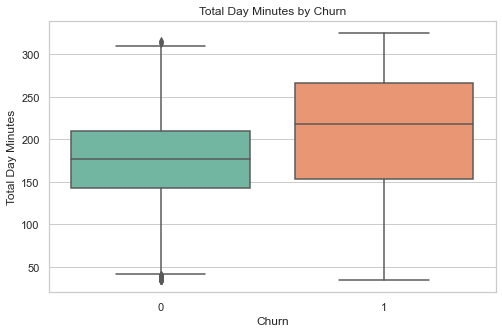

In [364]:

 #total day minutes
group1 = df[df['churn'] == 0]['total day minutes']
group2 = df[df['churn'] == 1]['total day minutes']

t_stat, p_val = ttest_ind(group1, group2)
print(f"T-test for 'total day minutes': t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

#plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total day minutes', data=df, palette='Set2')
plt.title("Total Day Minutes by Churn")
plt.xlabel("Churn")
plt.ylabel("Total Day Minutes")
plt.show()


#### Interpretation:

- t-statistic: -12.08  
- p-value: < 0.0001

There is a **statistically significant difference** in the average `total day minutes` between customers who churned and those who did not.  
The negative t-statistic suggests that churned customers tend to have higher daytime usage, which may indicate increased engagement before leaving, possibly due to unresolved service issues or dissatisfaction.

 **Business Insight**:  
Customers who use more daytime minutes are more likely to churn — possibly due to higher billing, unmet expectations, or inadequate support.


5.4 Chi-Square Test – Association between Categorical Variables

Example: churn vs international plan

In [363]:

contingency = pd.crosstab(df['churn'], df['international plan'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-Square Test: chi2 = {chi2:.2f}, p-value = {p:.4f}")


Chi-Square Test: chi2 = 222.57, p-value = 0.0000


Interpretation:

The high chi-square value (222.57) indicates a large deviation between observed and expected frequencies.

The very low p-value strongly suggests that the association is statistically significant.

We reject the null hypothesis — churn is not independent of the feature being tested.



5.5 ANOVA – Multi-group comparison
 
Testing churn differences across multiple customer service call levels:

ANOVA (total day minutes across service calls): F = 1.35, p = 0.2484


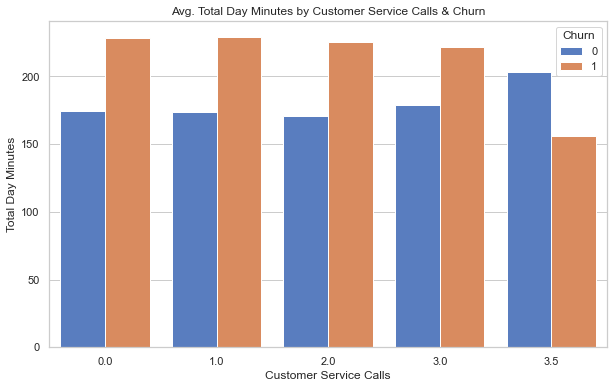

In [361]:
from scipy.stats import f_oneway

groups = [group['total day minutes'].values 
          for _, group in df.groupby('customer service calls')]

f_stat, p_val = f_oneway(*groups)
print(f"ANOVA (total day minutes across service calls): F = {f_stat:.2f}, p = {p_val:.4f}")
#Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='customer service calls', y='total day minutes', hue='churn', data=df, ci=None, palette='muted')
plt.title("Avg. Total Day Minutes by Customer Service Calls & Churn")
plt.xlabel("Customer Service Calls")
plt.ylabel("Total Day Minutes")
plt.legend(title='Churn')
plt.show()


Interpretation:

The F-statistic = 1.35 is relatively low.

The p-value = 0.2484 is greater than 0.05, meaning the result is not statistically significant

We fail to reject the null hypothesis.

There is no significant difference in average total day minutes across groups with different customer service call counts.